<a href="https://colab.research.google.com/github/K2FA/PCVK_Genap_2023/blob/main/Week10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

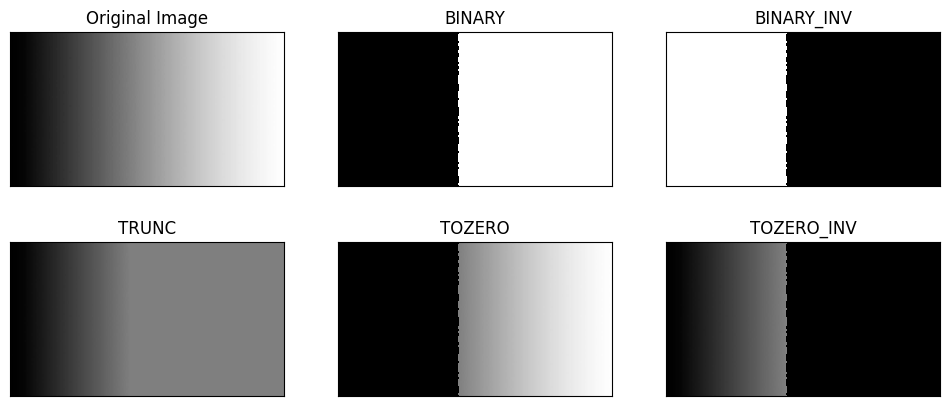

In [37]:
filename1 = ('/content/drive/MyDrive/PCVK/10/gradient.jpg')
img_global = cv.imread(filename1,0)

thresh1 = cv.imread(filename1)
thresh2 = cv.imread(filename1)
thresh3 = cv.imread(filename1)
thresh4 = cv.imread(filename1)
thresh5 = cv.imread(filename1)

# Original
thresh1[img_global>127] = 255
thresh1[img_global<=127] = 0

#Binary threshold inverse
thresh2 = 255 - thresh1           
#Threshold Truncate
thresh3[img_global>127] = 127
#Threshold Tozero
thresh4[img_global<=127] = 0
#Threshold Tozero Inverse
thresh5[img_global>127] = 0

titles = ['Original Image','BINARY','BINARY_INV','TRUNC', 'TOZERO', 'TOZERO_INV']
images = [img_global, thresh1, thresh2, thresh3, thresh4, thresh5]

plt.figure(figsize = (12,5))
for i in range(len(images)):
  plt.subplot(2,3,i+1),plt.imshow(images[i],'gray', interpolation='nearest')
  plt.title(titles[i])
  plt.xticks([]),plt.yticks([])

plt.show()

<ipython-input-31-762bd54e7f97>:19: RuntimeWarning: invalid value encountered in true_divide
  mb = sumb / wb
<ipython-input-31-762bd54e7f97>:20: RuntimeWarning: invalid value encountered in true_divide
  mf = (sumb - sumb)/wf


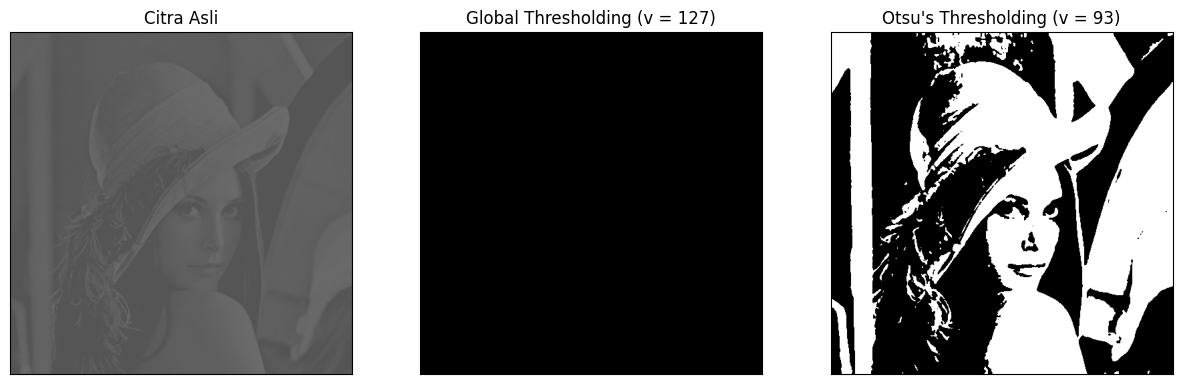

In [31]:
# Read Img
img_lena = cv.imread('/content/drive/MyDrive/PCVK/10/lena_gs_lc2.jpg')
blur = cv.GaussianBlur (img_lena, (5,5),0)

hist = cv.calcHist([blur],[0],None,[256], [0,256]) 
hist_norm = hist.ravel()/hist.max() 
Q = hist_norm.cumsum() 
bins = np.arange (256) 
wb = 0 
sumb = 0 
varmax = 0 
fn_min = np.inf 
thresh = -1

for i in range(0,255):
  wb += hist[i] 
  wf = (img_lena.shape[0]*img_lena.shape[1]) - wb 
  sumb += (i*hist[i]) 
  mb = sumb / wb 
  mf = (sumb - sumb)/wf 
  betweenvar = wb * wf * (mb - mf) * (mb - mf) 
  if (betweenvar>varmax):
    varmax = betweenvar
    thresh = i 

x = ("Otsu's Thresholding (v = ")+str(thresh)+")" 
ret, thresh1 = cv.threshold(blur, 127, 255, cv.THRESH_BINARY)
ret, thresh2 = cv.threshold (blur, thresh, 255, cv. THRESH_BINARY)

titles = ['Citra Asli', 'Global Thresholding (v = 127)', x] 
citra3 = [img_lena, thresh1, thresh2]

plt. figure(figsize = (15,15)) 
for i in range(len(citra3)):
    plt. subplot(1,3,i+1),plt.imshow(citra3[i], 'gray') 
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([]) 

plt.show()

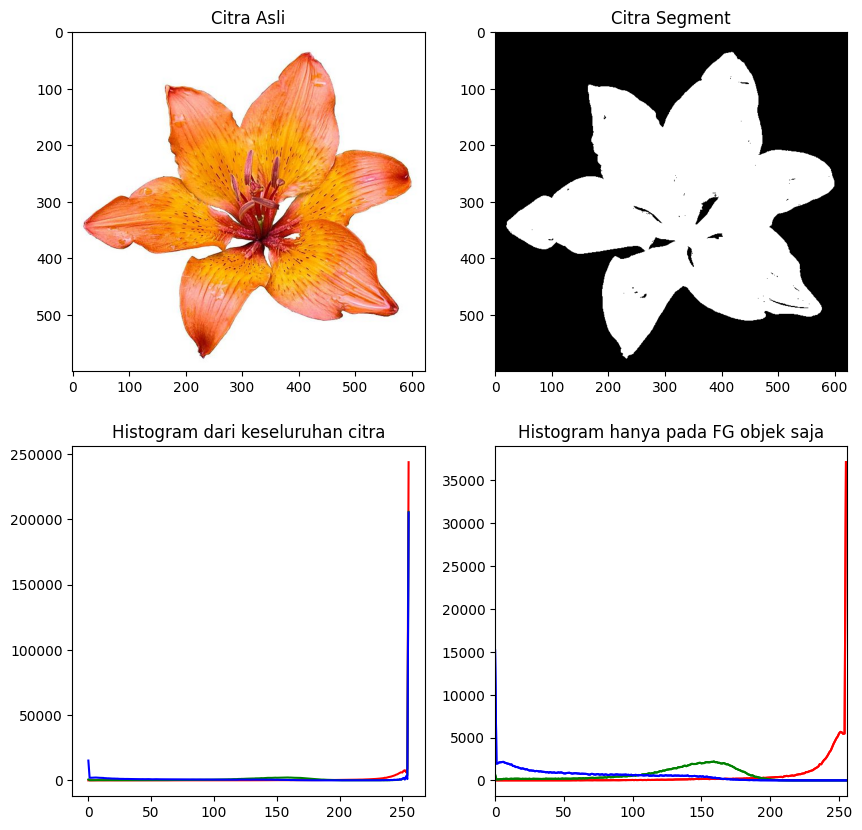

In [39]:
filename2 = ('/content/drive/MyDrive/PCVK/10/lily.jpg')
img_segment = cv.imread(filename2)
img_rgb = cv.cvtColor(img_segment,cv.COLOR_BGR2RGB)
img_gray = cv.cvtColor(img_rgb,cv.COLOR_BGR2GRAY)

ret3,mask = cv.threshold(img_gray,200,255,cv.THRESH_BINARY_INV)

plt.figure(figsize = (10,10))
plt.subplot(2,2,1),plt.imshow(img_rgb)
plt.title('Citra Asli')
plt.subplot(2,2,2),plt.imshow(mask, 'gray')
plt.title('Citra Segment')
color = ('r','g','b')

for i,col in enumerate(color):
    hist0 = cv.calcHist([img_rgb],[i],None,[256],[0,256])
    plt.subplot(2,2,3),plt.plot(hist0,color = col)
    plt.title('Histogram dari keseluruhan citra')
    hist1 = cv.calcHist([img_rgb],[i],mask,[256],[0,256])
    plt.subplot(2,2,4),plt.plot(hist1,color = col)
    plt.title('Histogram dari keseluruhan citra')
    hist1 = cv.calcHist([img_rgb],[i],mask,[256],[0,256])
    plt.subplot(2,2,4),plt.plot(hist1,color = col)
    plt.title('Histogram hanya pada FG objek saja')
    plt.xlim([0,256])

plt.show()

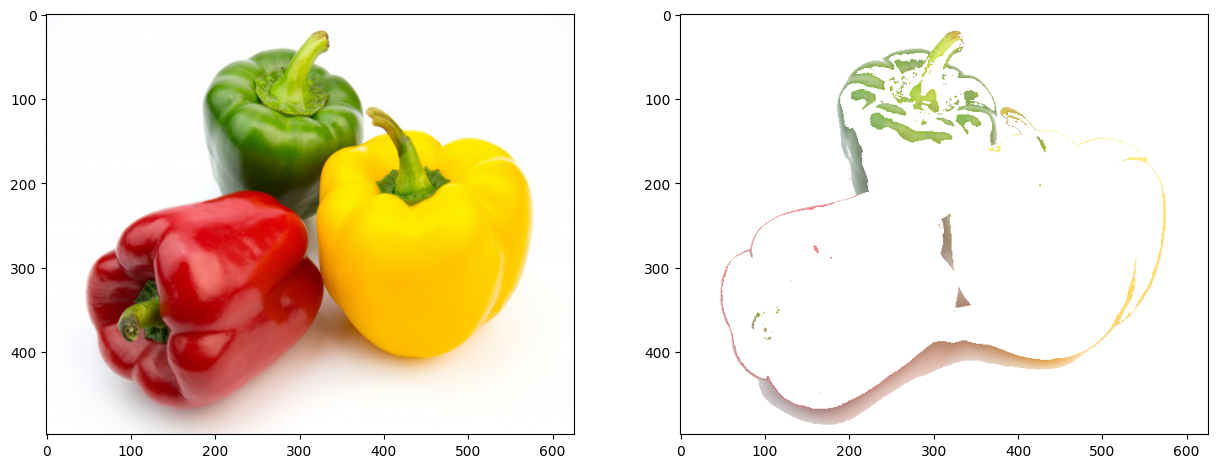

In [75]:
filename3 = ('/content/drive/MyDrive/PCVK/10/peppers.jpg')
img_segmentasi = cv.imread(filename3) 
img_rgb2 = cv.cvtColor(img_segmentasi,cv.COLOR_BGR2RGB)

pixel_values = img_rgb2.reshape((-1, 3)) 
pixel_values = np.float32(pixel_values)

criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 100, 0.2)

k = 6
_, labels, (centers) = cv.kmeans(pixel_values, k, None, criteria, 10, cv.KMEANS_RANDOM_CENTERS)

# konversi titik centroid ke dalam integer
centers = np.uint8(centers)

# flattening label array
labels = labels.flatten()

masked_image = np.copy(img_rgb2)
masked_image0 = masked_image.reshape((-1, 3))
masked_image0[labels != 1] = [255, 255, 255]
masked_image0 = masked_image0.reshape(img_rgb2.shape)

plt.figure(figsize = (15,12))
plt.subplot(2,2,1),plt.imshow(img_rgb2)
plt.subplot(2,2,2),plt.imshow(masked_image0)

plt.show()

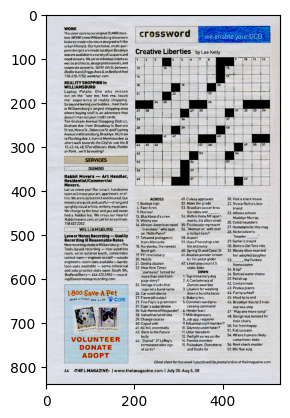

In [74]:
img_thresholding_biner = cv.imread('/content/drive/MyDrive/PCVK/10/crossword.jpg')


ret, thresh = cv.threshold(img_thresholding_biner, 125, 255, cv.THRESH_TOZERO)

plt.imshow(thresh)
plt.show()